In [1]:
import numpy as np
import matplotlib.pyplot as plt


NameError: name 'time' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Hodgkin-Huxley model (remains same as the single-compartment model)
V_rest = 0  # mV, Resting potential
g_Na = 120  # mS/cm^2, Sodium conductance
g_K = 36    # mS/cm^2, Potassium conductance
g_L = 0.3   # mS/cm^2, Leak conductance
V_Na = 115  # mV, Sodium reversal potential
V_K = -12   # mV, Potassium reversal potential
V_L = 10.6  # mV, Leak reversal potential
C_m = 1     # µF/cm^2, Membrane capacitance

# Time settings
dt = 0.01  # ms per timestep
time = np.arange(0, 100, dt)  # 100 ms total duration

# Initialize compartments
num_compartments = 100
V = np.zeros((num_compartments, len(time)))
m = np.zeros_like(V)
n = np.zeros_like(V)
h = np.zeros_like(V)
I_stim = np.zeros_like(V)  # Initializing the stimulus for each compartment

# Define the stimulus for a specific compartment
# For example, stimulate compartment 1 from t=5ms to t=10ms with 5μA current
compartment_to_stimulate = 1
start_stimulus_time = int(5 / dt)  # at t=5ms
end_stimulus_time = int(10 / dt)  # at t=10ms
I_stim[compartment_to_stimulate, start_stimulus_time:end_stimulus_time] = 5  # 5μA current

# Axonal resistance (to be calculated based on axon properties)
R_a = 1  # Axial resistance between compartments in kOhm

# Initialization for each compartment based on the single-compartment model
for comp in range(num_compartments):
    V[comp, 0] = V_rest
    m[comp, 0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
    n[comp, 0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
    h[comp, 0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))

# ... (rest of the multicompartment HH model simulation code)

# Initialize constants and parameters
num_compartments = 100  # Number of compartments
R_a = 1  # Axial resistance between compartments in kOhm
# The rest of the constants remain the same as in the single-compartment model

# Initialize vectors for each compartment
V = np.zeros((num_compartments, len(time)))  # Potential for each compartment
m = np.zeros_like(V)
n = np.zeros_like(V)
h = np.zeros_like(V)

# Initial conditions for each compartment
for comp in range(num_compartments):
    V[comp, 0] = V_rest
    m[comp, 0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
    n[comp, 0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
    h[comp, 0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))
    
def alpha_m(V): 
    return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1) 

def beta_m(V): 
    return 4.0 * np.exp(-V / 18)

def alpha_n(V): 
    return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1) 

def beta_n(V): 
    return 0.125 * np.exp(-V / 80) 

def alpha_h(V): 
    return 0.07 * np.exp(-V / 20) 

def beta_h(V): 
    return 1 / (np.exp((30 - V) / 10) + 1) 
# Update the gating variables and potential over time for each compartment
for t in range(1, len(time)):
    for comp in range(num_compartments):
        # Calculate the currents for HH model
        I_Na = g_Na * m[comp, t-1]**3 * h[comp, t-1] * (V[comp, t-1] - V_Na)
        I_K = g_K * n[comp, t-1]**4 * (V[comp, t-1] - V_K)
        I_leak = g_L * (V[comp, t-1] - V_L)
        
        # Determine the current from adjacent compartments (for internal compartments)
        I_adj = 0
        if comp > 0:
            I_adj += (V[comp-1, t-1] - V[comp, t-1]) / R_a
        if comp < num_compartments - 1:
            I_adj += (V[comp+1, t-1] - V[comp, t-1]) / R_a
        
        # Update gating variables using the Euler method
        m[comp, t] = m[comp, t-1] + dt * (alpha_m(V[comp, t-1]) * (1 - m[comp, t-1]) - beta_m(V[comp, t-1]) * m[comp, t-1])
        n[comp, t] = n[comp, t-1] + dt * (alpha_n(V[comp, t-1]) * (1 - n[comp, t-1]) - beta_n(V[comp, t-1]) * n[comp, t-1])
        h[comp, t] = h[comp, t-1] + dt * (alpha_h(V[comp, t-1]) * (1 - h[comp, t-1]) - beta_h(V[comp, t-1]) * h[comp, t-1])
        
        # Update membrane potential
        V[comp, t] = V[comp, t-1] + (I_stim[comp, t] - I_Na - I_K - I_leak + I_adj) / C_m * dt

# Plot results for all compartments
plt.figure(figsize=(14, 6))
plt.imshow(V, aspect='auto', extent=[0, max(time), 0, num_compartments])
plt.colorbar(label='Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Compartment Number')
plt.title('Propagation of Action Potential in Multicompartment Model')
plt.show()


NameError: name 'alpha_m' is not defined

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

# Constants from your code
# ... (Same as in your provided code)
# Constants for Hodgkin-Huxley model
V_rest = 0  # mV, Resting potential
g_Na = 120  # mS/cm^2, Sodium conductance
g_K = 36    # mS/cm^2, Potassium conductance
g_L = 0.3   # mS/cm^2, Leak conductance
V_Na = 115  # mV, Sodium reversal potential
V_K = -12   # mV, Potassium reversal potential
V_L = 10.6  # mV, Leak reversal potential
C_m = 1     # µF/cm^2, Membrane capacitance

# Time settings
dt = 0.01  # ms per timestep
time = np.arange(0, 100, dt)  # 100 ms total duration

def temperature_correction(T):
    return 3 ** ((T - 6.3) / 10)

def alpha_m(V): 
    return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1) 

def beta_m(V): 
    return 4.0 * np.exp(-V / 18)

def alpha_n(V): 
    return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1) 

def beta_n(V): 
    return 0.125 * np.exp(-V / 80) 

def alpha_h(V): 
    return 0.07 * np.exp(-V / 20) 

def beta_h(V): 
    return 1 / (np.exp((30 - V) / 10) + 1) 

# Setup the compartment model
num_compartments = 100
R_a = 1.0  # Axial resistance, ohm
Delta_x = 0.1  # Compartment length, cm
C_m = 1.0  # Membrane capacitance, uF/cm^2

# Initialize membrane potentials and gating variables
V_m = np.full((num_compartments, len(time)), V_rest)
m = np.zeros((num_compartments, len(time)))
n = np.zeros((num_compartments, len(time)))
h = np.zeros((num_compartments, len(time)))

# Set initial conditions for gating variables
m[:, 0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
n[:, 0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
h[:, 0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))

# Define the connection matrix C
C = np.diag([-2] * num_compartments) + np.diag([1] * (num_compartments - 1), k=1) + np.diag([1] * (num_compartments - 1), k=-1)
C[0, 0] = C[-1, -1] = -1  # Boundary conditions

# Define the stimulus current for specific compartments
I_stim = np.zeros((num_compartments, len(time)))
# Example: Stimulate compartment 1 at t=5ms with a 5uA current for 1ms
I_stim[0, int(5/dt):int(6/dt)] = 5

# Perform the simulation
for t in range(1, len(time)):
    # Update gating variables for all compartments
    # ... (Same update rules as in your provided code, but for each compartment)
    
    # Compute the ion currents based on the updated gating variables
    I_Na = g_Na * m[:, t-1]**3 * h[:, t-1] * (V_m[:, t-1] - V_Na)
    I_K = g_K * n[:, t-1]**4 * (V_m[:, t-1] - V_K)
    I_leak = g_L * (V_m[:, t-1] - V_L)

    # Construct the vector b for the right-hand side of the equation
    b = V_m[:, t-1] + (Delta_t / C_m) * (I_stim[:, t] - I_Na - I_K - I_leak)

    # Construct the matrix A for the left-hand side of the equation
    A = np.eye(num_compartments) - (Delta_t / (C_m * R_a * Delta_x**2)) * C

    # Solve the system of equations for the membrane potentials at t+dt
    V_m[:, t] = solve(A, b)

# Plot the membrane potentials as a colormap
plt.figure(figsize=(10, 8))
plt.imshow(V_m, aspect='auto', extent=[0, max(time), 0, num_compartments])
plt.colorbar(label='Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Compartment Number')
plt.title('Multicompartment Hodgkin-Huxley Model')
plt.show()


NameError: name 'Delta_t' is not defined

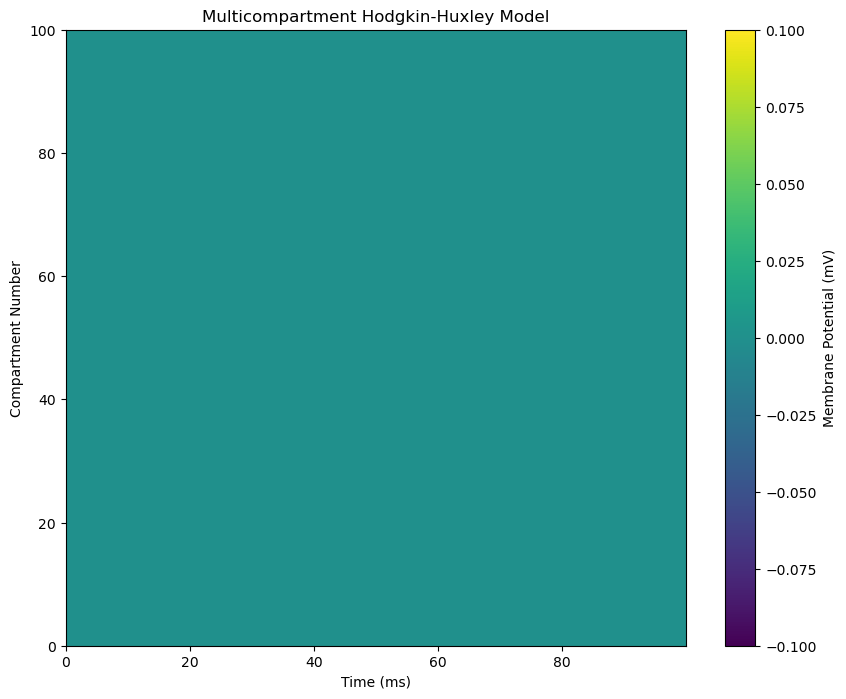

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Constants for Hodgkin-Huxley model
V_rest = 0  # mV, Resting potential
g_Na = 120  # mS/cm^2, Sodium conductance
g_K = 36    # mS/cm^2, Potassium conductance
g_L = 0.3   # mS/cm^2, Leak conductance
V_Na = 115  # mV, Sodium reversal potential
V_K = -12   # mV, Potassium reversal potential
V_L = 10.6  # mV, Leak reversal potential


length = 0.1 # Length of a compartment (cm) ？？？？？
num_compartments = 100  # Number of compartments

rou_axon = 1
r_axon = 2 * 10^-6
l_comp = 0.1 * 10^-6
R_a = rou_axon*l_comp/(pi*r^2)
print(R_a)
C_m = 1.0  # Membrane capacitance, uF/cm^2  单位一致？


# Time settings
dt = 0.025  # ms per timestep 25us
time = np.arange(0, 100, dt)  # 100 ms total duration

# Function definitions
# ... (include all the functions like alpha_m, beta_m, etc., from your provided code)
def alpha_m(V): 
    return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1) 

def beta_m(V): 
    return 4.0 * np.exp(-V / 18)

def alpha_n(V): 
    return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1) 

def beta_n(V): 
    return 0.125 * np.exp(-V / 80) 

def alpha_h(V): 
    return 0.07 * np.exp(-V / 20) 

def beta_h(V): 
    return 1 / (np.exp((30 - V) / 10) + 1) 

# Initialize membrane potentials and gating variables
V_m = np.full((num_compartments, len(time)), V_rest)
m = np.zeros((num_compartments, len(time)))
n = np.zeros((num_compartments, len(time)))
h = np.zeros((num_compartments, len(time)))

# Set initial conditions for gating variables
m[:, 0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
n[:, 0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
h[:, 0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))

# Define the connection matrix C as a banded matrix for efficient solving
# The banded matrix format for solve_banded is a 2D array with shape (2 * lower + upper + 1, num_compartments)
C_banded = np.zeros((3, num_compartments))
C_banded[1, :] = -2 / (R_a * Delta_x**2)  # Main diagonal
C_banded[0, 1:] = 1 / (R_a * Delta_x**2)  # Upper diagonal
C_banded[2, :-1] = 1 / (R_a * Delta_x**2) # Lower diagonal

# We divide by R_a and multiply by Delta_t / (C_m * length**2) here to form the matrix A in the banded format directly
# C = -dt / (C_m * R_a * length**2) * diagonals
C_banded *= dt / (C_m * R_a * length**2)

# Define the stimulus current for specific compartments
I_stim = np.zeros((num_compartments, len(time)))
# Example: Stimulate compartment 1 at t=5ms with a 5uA current for 1ms
I_stim[0, int(5/dt):int(6/dt)] = 5

# Perform the simulation
for t in range(1, len(time)):
    # Update gating variables for all compartments
    # ... (Use the same update rules as in your provided code, applied to each compartment)
    
    # Compute the ion currents based on the updated gating variables
    I_Na = g_Na * m[:, t-1]**3 * h[:, t-1] * (V_m[:, t-1] - V_Na)
    I_K = g_K * n[:, t-1]**4 * (V_m[:, t-1] - V_K)
    I_leak = g_L * (V_m[:, t-1] - V_L)

    # Construct the vector b for the right-hand side of the equation
#     b = V_m[:, t-1] + (dt / C_m) * (I_stim[:, t] - I_Na - I_K - I_leak)
    b = V_m[:, t-1] + (dt / C_m) * (I_stim[:, t] - I_Na - I_K - I_leak)

    # Construct the matrix A for the left-hand side of the equation
#     A = np.eye(num_compartments) - (dt / C_m) * C_banded
    
    # Solve the system of equations using the banded matrix solver
    V_m[:, t] = solve_banded((1, 1), C_banded, b)

# Plot the membrane potentials as a colormap
plt.figure(figsize=(10, 8))
plt.imshow(V_m, aspect='auto', extent=[0, max(time), 0, num_compartments])
plt.colorbar(label='Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Compartment Number')
plt.title('Multicompartment Hodgkin-Huxley Model')
plt.show()


In [3]:
import numpy as np
# C是一个三对角矩阵，其特点如下：
# 主对角线上的元素为 -2。
# 第一个和最后一个元素（即左上角和右下角）为 -1。
# 紧挨主对角线的元素（即次对角线上的元素）为 1。
# 所有其他元素为 0。
# Define the size of the matrix
N = 100  # Assuming we have 100 compartments

# Initialize the matrix C with zeros
C = np.zeros((N, N))

# Set the diagonal values to -2
np.fill_diagonal(C, -2) 
# Set the first and last diagonal values to -1
C[0, 0] = C[-1, -1] = -1

# Set the off-diagonals to 1
for i in range(N-1):
    C[i, i+1] = 1
    C[i+1, i] = 1

# The resulting matrix C would be the one you're looking for
print(C)

[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -1.]]


[[-2  1  0 ...  0  0  0]
 [ 1 -2  1 ...  0  0  0]
 [ 0  1 -2 ...  0  0  0]
 ...
 [ 0  0  0 ... -2  1  0]
 [ 0  0  0 ...  1 -2  1]
 [ 0  0  0 ...  0  1 -1]]


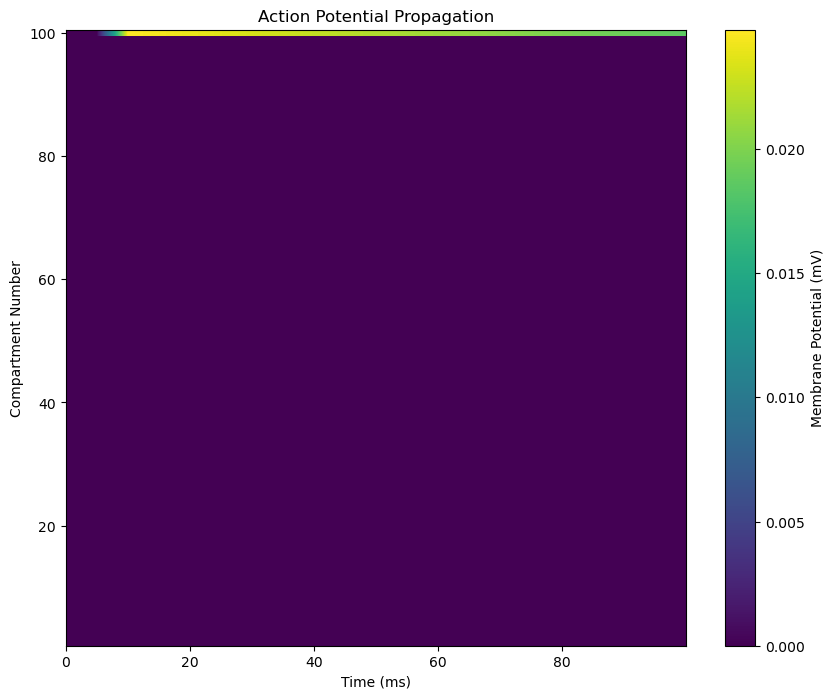

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants from the appendix
g_Na = 120.0  # mS/cm^2
g_K = 36.0    # mS/cm^2
g_L = 0.3     # mS/cm^2
V_Na = 115.0  # mV
V_K = -12.0   # mV
V_L = 10.6    # mV
V_rest = 0.0  # mV
C_m = 1.0     # μF/cm^2
p_axon = 1.0  # Ohm*m
r_axon = 2e-6 # m
l_comp = 0.1e-6 # m
T = 6.3       # Temperature in °C

# Derived constants
Ra = p_axon / (np.pi * r_axon**2)  # Axial resistance

C = np.diag([-2] * (n_compartments - 1) + [-1]) + np.diag([1] * (n_compartments - 1), k=1) + np.diag([1] * (n_compartments - 1), k=-1)
print(C)
A = np.eye(n_compartments) - dt / (C_m * Ra) * C

# Simulation parameters
n_compartments = 100
dt = 25e-6  # Time step (s)
duration = 100e-3  # Total duration of simulation (s)
n_timesteps = int(duration / dt)

# Initialize state variables
V = V_rest * np.ones(n_compartments)
m = np.zeros(n_compartments)
h = np.zeros(n_compartments)
n = np.zeros(n_compartments)
time = np.arange(0, duration, dt)

# Stimulus
I_stim = np.zeros((n_compartments, n_timesteps))
# Stimulate at the last compartment with a 5 ms pulse starting at t=5 ms
I_stim[-1, int(5e-3/dt):int(10e-3/dt)] = 5.0  # μA/cm^2

# Additional stimulus for the second experiment
# Stimulate compartment 20 at t=0 ms and compartment 80 at t=15 ms
# I_stim[19, 0:int(5e-3/dt)] = 5.0  # μA/cm^2
# I_stim[79, int(15e-3/dt):int(20e-3/dt)] = 5.0  # μA/cm^2

# Hodgkin-Huxley rate functions
def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
def beta_m(V): return 4.0 * np.exp(-V / 18)
def alpha_h(V): return 0.07 * np.exp(-V / 20)
def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)
def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-V / 80)

# Temperature correction
k = 3.0**((T - 6.3) / 10)

# Initialize membrane potentials matrix for visualization
Vm_matrix = np.zeros((n_compartments, n_timesteps))

# Simulation loop
for t_index in range(1, n_timesteps):
    # Update gating variables
    m += dt * k * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    h += dt * k * (alpha_h(V) * (1 - h) - beta_h(V) * h)
    n += dt * k * (alpha_n(V) * (1 - n) - beta_n(V) * n)
    
    # Calculate currents
    I_Na = g_Na * (m**3) * h * (V - V_Na)
    I_K = g_K * (n**4) * (V - V_K)
    I_L = g_L * (V - V_L)
    
    # Total ionic current
    I_ion = I_Na + I_K + I_L
    
    # Implicit Euler method for V
    A = np.eye(n_compartments) - dt / C_m * np.diag(I_ion)
    b = V + dt / C_m * I_stim[:, t_index]
    V = solve(A, b)
    
    # Record the potentials for visualization
    Vm_matrix[:, t_index] = V

# Visualization using pcolormesh
plt.figure(figsize=(10, 8))
plt.pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix, cmap='viridis', shading='auto')
plt.colorbar(label='Membrane Potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Compartment Number')
plt.title('Action Potential Propagation')
plt.show()


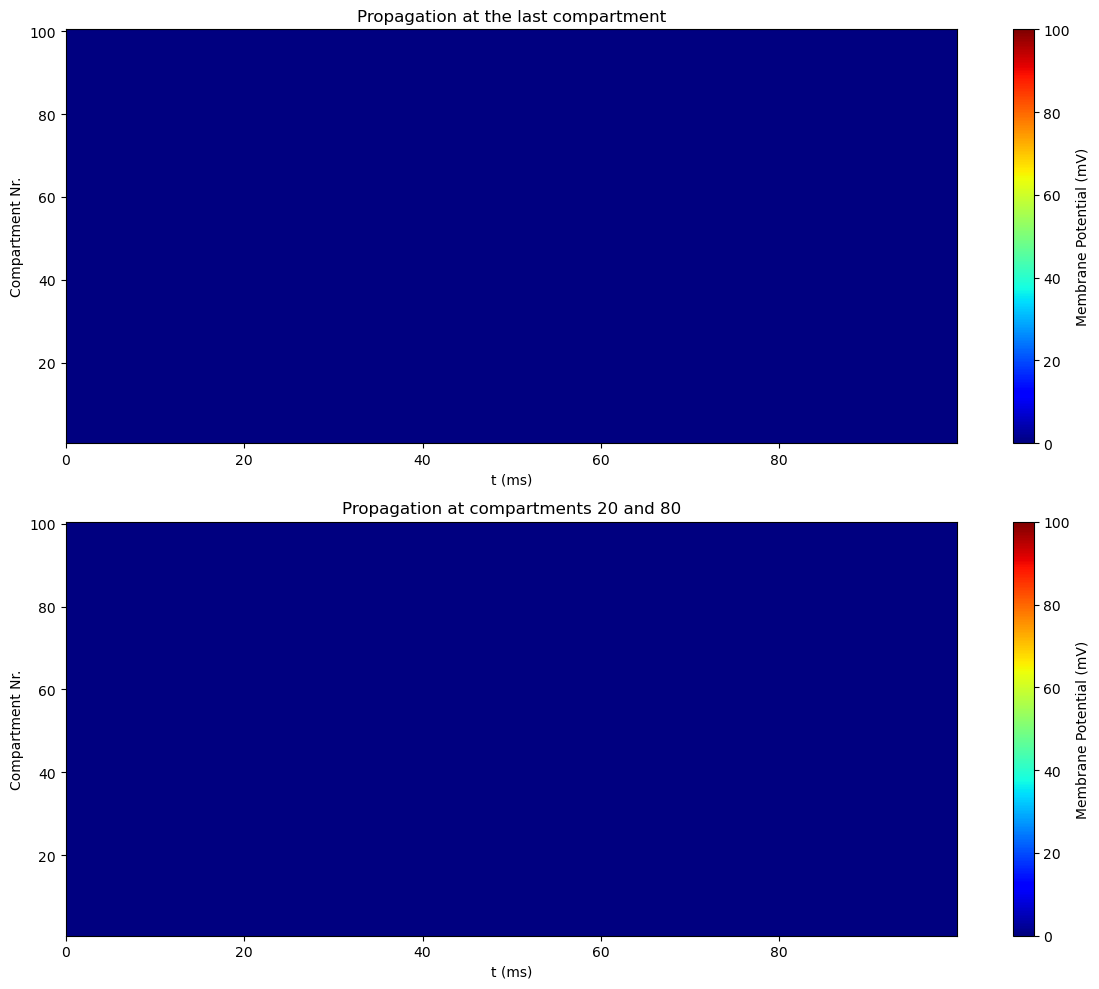

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants from the appendix
g_Na = 120.0  # mS/cm^2
g_K = 36.0    # mS/cm^2
g_L = 0.3     # mS/cm^2
V_Na = 115.0  # mV
V_K = -12.0   # mV
V_L = 10.6    # mV
V_rest = 0.0  # mV
C_m = 1.0     # μF/cm^2
p_axon = 1.0  # Ohm*m
r_axon = 2e-6 # m
l_comp = 0.1e-6 # m
T = 6.3       # Temperature in °C

# Derived constants
Ra = p_axon * l_comp / (np.pi * r_axon**2)  # Axial resistance
# print(Ra)

# Simulation parameters
n_compartments = 100
duration = 100e-3 
dt = 25e-6  
n_timesteps = int(duration / dt) # 4000

# Initialize state variables
time = np.arange(0, duration, dt)

# Stimulus for the first experiment: Stimulate at the last compartment
I_stim_1 = np.zeros((n_compartments, n_timesteps))
# print(I_stim_1.shape)
I_stim_1[-1, int(5e-3/dt):int(10e-3/dt)] = 5.0  # μA/cm^2

# Stimulus for the second experiment: Stimulate compartments 20 and 80
I_stim_2 = np.zeros((n_compartments, n_timesteps))
I_stim_2[19, 0:int(5e-3/dt)] = 5.0  # μA/cm^2
I_stim_2[79, int(15e-3/dt):int(20e-3/dt)] = 5.0  # μA/cm^2

# Hodgkin-Huxley rate functions
def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
def beta_m(V): return 4.0 * np.exp(-V / 18)
def alpha_h(V): return 0.07 * np.exp(-V / 20)
def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)
def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-V / 80)
# Temperature correction
k = 3.0**((T - 6.3) / 10)
  
# Define the C matrix according to the provided structure
C = np.diag([-2] * (n_compartments - 1) + [-1]) + np.diag([1] * (n_compartments - 1), k=1) + np.diag([1] * (n_compartments - 1), k=-1)
# print(C.size)
A = np.eye(n_compartments) - dt / (C_m * Ra) * C
# print(A)

def run_simulation(I_stim):    
    Vm_matrix = np.zeros((n_compartments, n_timesteps)) # 100*4000

    V = np.zeros((n_compartments, 1))
    m = np.zeros((n_compartments, 1))
    h = np.zeros((n_compartments, 1))
    n = np.zeros((n_compartments, 1))

    # m[0] 只给第一行0列赋值了
    m[:, 0] = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
    n[:, 0] = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
    h[:, 0] = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))
    V[:, 0] = V_rest
    
    I_Na = np.zeros_like(m)
    I_K = np.zeros_like(m)
    I_L = np.zeros_like(m)
    I_ion = np.zeros_like(m)
    V_next = np.zeros_like(m)
    
    for t_index in range(1, n_timesteps):
        # Predict the gating variables at t + dt using the values at t
        m_next = m + dt * k * (alpha_m(V) * (1 - m) - beta_m(V) * m)
        h_next = h + dt * k * (alpha_h(V) * (1 - h) - beta_h(V) * h)
        n_next = n + dt * k * (alpha_n(V) * (1 - n) - beta_n(V) * n)

        # Calculate the ionic currents at t + dt using predicted gating variables
        I_Na = g_Na * m_next**3 * h_next * (V - V_Na)
        I_K = g_K * n_next**4 * (V - V_K)
        I_L = g_L * (V - V_L)
        I_ion = I_Na + I_K + I_L
#         print(I_ion.shape)
        
        temp = I_stim[:, t_index].reshape(-1, 1) # !!!!
#         print(temp.shape) #（100, ）不等于(100,1)

        b = V + dt * (temp - I_ion)
#         print(b.shape)

        # Solve the system of equations for V at t + dt
        V_next = solve(A, b) #应该是100*1的vector
#         print(V_next.shape)
        
        # Store the computed potentials in the matrix
#         Vm_matrix[:, t_index] = V_next  # ！！！！！！！！ 
# 如果 a 是一个大小为 100x4000 的二维NumPy数组，那么当你执行 a[:, 0] 时，你应该得到一个大小为 (100,) 的一维数组。这个操作表示取 a 数组的第一列，但结果是作为一维数组返回的。
# 如果 a[:, 0] 的结果是 (100, 1)，这意味着你得到的是一个二维数组
        Vm_matrix[:, t_index:t_index+1] = V_next

        # Update variables for the next iteration
        V = V_next
        m, h, n = m_next, h_next, n_next
    
    return Vm_matrix

# Run simulations
Vm_matrix_1 = run_simulation(I_stim_1)
# print(Vm_matrix_1) # 所有值是一摸一样
Vm_matrix_2 = run_simulation(I_stim_2)

# print(Vm_matrix_1)
# Visualization
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First experiment
c1 = axs[0].pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix_1, cmap='jet', vmin=0, vmax=100)
fig.colorbar(c1, ax=axs[0], label='Membrane Potential (mV)')
axs[0].set_title('Propagation at the last compartment')
axs[0].set_ylabel('Compartment Nr.')
axs[0].set_xlabel('t (ms)')

# # Second experiment
c2 = axs[1].pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix_2, cmap='jet', vmin=0, vmax=100)
fig.colorbar(c2, ax=axs[1], label='Membrane Potential (mV)')
axs[1].set_title('Propagation at compartments 20 and 80')
axs[1].set_ylabel('Compartment Nr.')
axs[1].set_xlabel('t (ms)')

plt.tight_layout()
plt.show()


In [2]:
print(Vm_matrix_1)

[[0.00000000e+00 8.09272954e-09 1.61853220e-08 ... 3.13536159e-05
  3.13612342e-05 3.13688523e-05]
 [0.00000000e+00 8.09272956e-09 1.61853221e-08 ... 3.13538106e-05
  3.13614290e-05 3.13690472e-05]
 [0.00000000e+00 8.09272956e-09 1.61853221e-08 ... 3.13538106e-05
  3.13614290e-05 3.13690472e-05]
 ...
 [0.00000000e+00 8.09272956e-09 1.61853221e-08 ... 3.13538122e-05
  3.13614306e-05 3.13690488e-05]
 [0.00000000e+00 8.09272956e-09 1.61853221e-08 ... 3.16278352e-05
  3.16355236e-05 3.16432119e-05]
 [0.00000000e+00 8.09272956e-09 1.61853221e-08 ... 2.36620054e-02
  2.36616884e-02 2.36613713e-02]]


In [15]:
a = "g"
print(a == "g")
print((a == "g").astype(int))

True


AttributeError: 'bool' object has no attribute 'astype'

[[0.00000000e+00 4.38648533e-02 1.23487096e-01 ... 1.77438749e+05
  1.77508983e+05 1.77579224e+05]
 [0.00000000e+00 4.38648535e-02 1.23487097e-01 ... 1.77439573e+05
  1.77509807e+05 1.77580048e+05]
 [0.00000000e+00 4.38648535e-02 1.23487097e-01 ... 1.77439573e+05
  1.77509807e+05 1.77580048e+05]
 ...
 [0.00000000e+00 4.38648535e-02 1.23487097e-01 ... 1.77439573e+05
  1.77509807e+05 1.77580048e+05]
 [0.00000000e+00 4.38648535e-02 1.23487097e-01 ... 1.77439573e+05
  1.77509807e+05 1.77580048e+05]
 [0.00000000e+00 4.38648535e-02 1.23487097e-01 ... 1.77439573e+05
  1.77509807e+05 1.77580048e+05]]


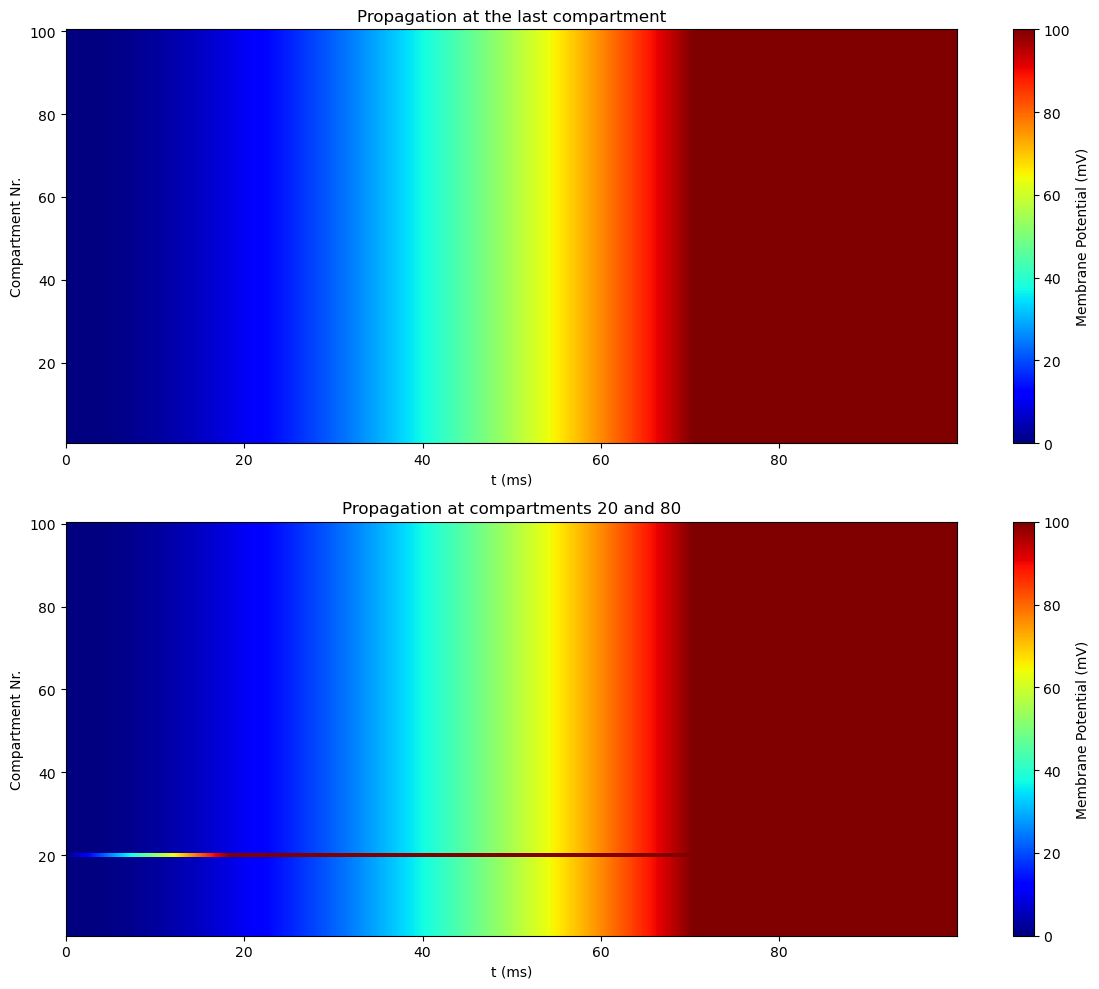

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants from the appendix
g_Na = 120.0  # mS/cm^2
g_K = 36.0    # mS/cm^2
g_L = 0.3     # mS/cm^2
V_Na = 115.0  # mV
V_K = -12.0   # mV
V_L = 10.6    # mV
V_rest = 0.0  # mV
C_m = 1.0     # μF/cm^2
p_axon = 1.0  # Ohm*m
r_axon = 2e-6 # m
l_comp = 0.1e-6 # m
T = 6.3       # Temperature in °C

# Derived constants
Ra = p_axon * l_comp / (np.pi * r_axon**2)  # Axial resistance

# Simulation parameters
n_compartments = 100
duration = 100e-3 
dt = 25e-6  
n_timesteps = int(duration / dt)

# Initialize state variables
time = np.arange(0, duration, dt)

# Stimulus for the first experiment: Stimulate at the last compartment
I_stim_1 = np.zeros((n_compartments, n_timesteps))
I_stim_1[-1, int(5/dt):int(10/dt)] = 5.0  # μA/cm^2
# print(I_stim_1[-1, int(5e-3/dt)+1])

# Stimulus for the second experiment: Stimulate compartments 20 and 80
I_stim_2 = np.zeros((n_compartments, n_timesteps))
I_stim_2[19, 0:int(5/dt)] = 5.0  # μA/cm^2
I_stim_2[79, int(15/dt):int(20/dt)] = 5.0  # μA/cm^2

# Hodgkin-Huxley rate functions
def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
def beta_m(V): return 4.0 * np.exp(-V / 18)
def alpha_h(V): return 0.07 * np.exp(-V / 20)
def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)
def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-V / 80)

# Temperature correction
k = 3.0**((T - 6.3) / 10)
  
# Define the C matrix according to the provided structure
C = np.diag([-2] * (n_compartments - 1) + [-1]) + np.diag([1] * (n_compartments - 1), k=1) + np.diag([1] * (n_compartments - 1), k=-1)
A = np.eye(n_compartments) - dt / (C_m * Ra) * C

# 计算m,n,h
def exponential_euler_1order(slope, V0, t0, t1, delta_t):
    num_t = int((t1-t0)/delta_t) + 1
    t = np.linspace(t0, t1, num_t)
    V = np.zeros(num_t)
    V[0] = V0
    A = -1
    B = np.linspace(-t0+1, -t1+1, num_t) #1-t
    for i in range(1, num_t): 
        V[i] = V[i-1] * np.exp(A * delta_t) + (B[i-1] / A) * (np.exp(A * delta_t) - 1)
    return t, V

def run_simulation(I_stim):    
    Vm_matrix = np.zeros((n_compartments, n_timesteps)) # 100*4000

    V = V_rest * np.ones((n_compartments, 1)) 
    m = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest)) * np.ones((n_compartments, 1))
    h = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest)) * np.ones((n_compartments, 1))
    n = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest)) * np.ones((n_compartments, 1))
    
    # Set the initial condition for Vm_matrix
    Vm_matrix[:, 0] = V[:, 0].flatten()
    
    for t_index in range(1, n_timesteps):
        # Predict the gating variables at t + dt using the values at t
        m = (m + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)  #还是用i-1s
        h = (h + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)
        n = (n + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)
        
#         m_next = m + dt * k * (alpha_m(V) * (1 - m) - beta_m(V) * m)
#         h_next = h + dt * k * (alpha_h(V) * (1 - h) - beta_h(V) * h)
#         n_next = n + dt * k * (alpha_n(V) * (1 - n) - beta_n(V) * n)

        # Calculate the ionic currents at t + dt using predicted gating variables
        I_Na = g_Na * m**3 * h * (V - V_Na)
        I_K = g_K * n**4 * (V - V_K)
        I_L = g_L * (V - V_L)
        I_ion = I_Na + I_K + I_L
        
        # Construct the b vector for the implicit Euler method
        b = V + dt / C_m * (I_stim[:, t_index].reshape(-1, 1) - I_ion) # 将一维数组转换成二维列向量
        
#         print(V)
        # Solve the system of equations for V at t + dt
        V = solve(A, b)

        # Store the computed potentials in the matrix
        Vm_matrix[:, t_index] = V.flatten()

#        # Update variables for the next iteration
#         V, m, h, n = V_next, m_next, h_next, n_next

    return Vm_matrix
# Run simulations
Vm_matrix_1 = run_simulation(I_stim_1)  # Scale the results
Vm_matrix_2 = run_simulation(I_stim_2)  # Scale the results
print(Vm_matrix_1* 1e6)
# Visualization
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First experiment
c1 = axs[0].pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix_1* 1e3, cmap='jet', vmin=0, vmax=100)
fig.colorbar(c1, ax=axs[0], label='Membrane Potential (mV)')
axs[0].set_title('Propagation at the last compartment')
axs[0].set_ylabel('Compartment Nr.')
axs[0].set_xlabel('t (ms)')
# fig.xticks(np.arange(0, 101, 10)) # plt 刻度设为一
# plt.yticks(np.arange(-20, 121, 20))
# Second experiment
c2 = axs[1].pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix_2* 1e3, cmap='jet', vmin=0, vmax=100)
fig.colorbar(c2, ax=axs[1], label='Membrane Potential (mV)')
axs[1].set_title('Propagation at compartments 20 and 80')
axs[1].set_ylabel('Compartment Nr.')
axs[1].set_xlabel('t (ms)')

plt.tight_layout()
plt.show()


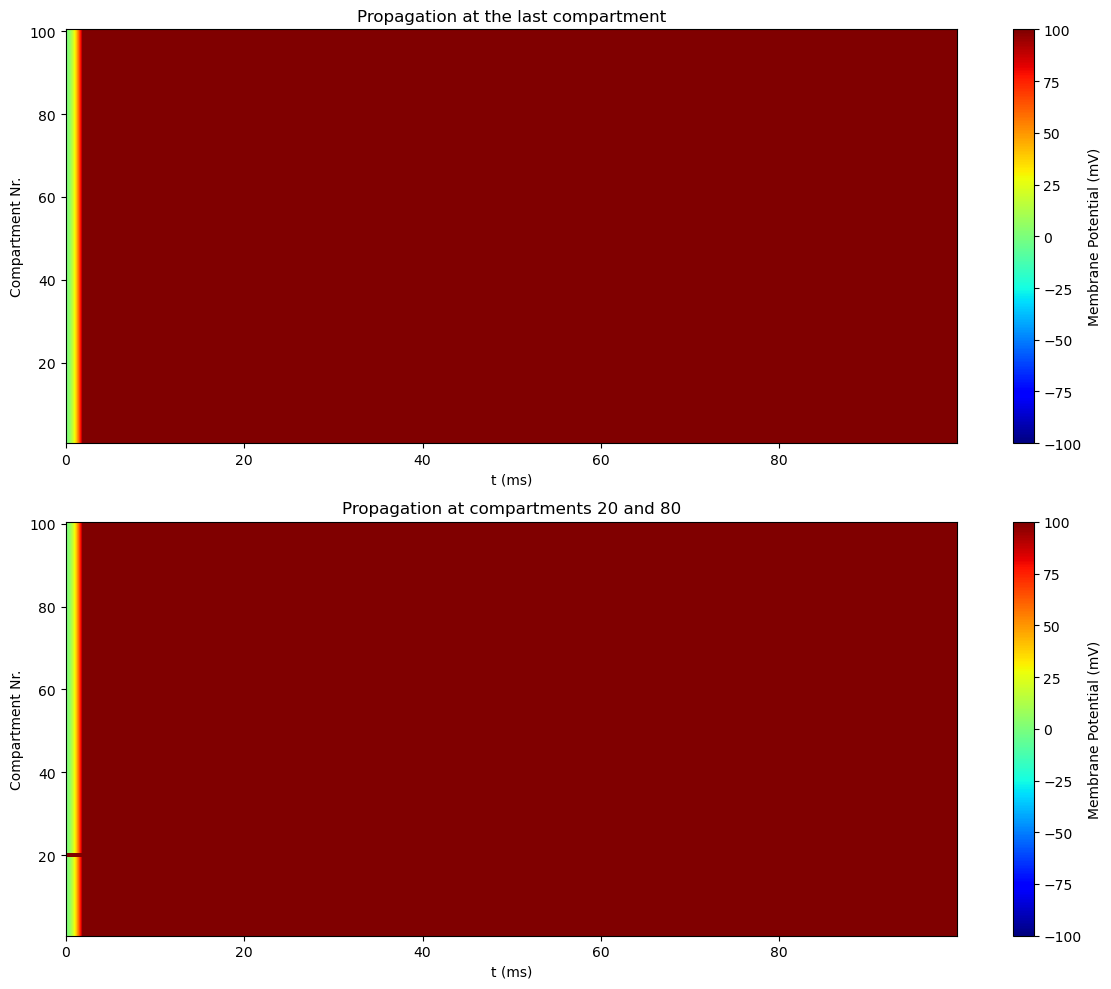

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants from the appendix
g_Na = 120.0  # mS/cm^2
g_K = 36.0    # mS/cm^2
g_L = 0.3     # mS/cm^2
V_Na = 115.0  # mV
V_K = -12.0   # mV
V_L = 10.6    # mV
V_rest = 0.0  # mV
C_m = 1.0     # μF/cm^2
p_axon = 1.0  # Ohm*m
r_axon = 2e-6 # m
l_comp = 0.1e-6 # m
T = 6.3       # Temperature in °C

# Derived constants
Ra = p_axon * l_comp / (np.pi * r_axon**2)  # Axial resistance

# Simulation parameters
n_compartments = 100
duration = 100e-3 
dt = 25e-6  
n_timesteps = int(duration / dt)

# Initialize state variables
time = np.arange(0, duration, dt)

# Stimulus for the first experiment: Stimulate at the last compartment
I_stim_1 = np.zeros((n_compartments, n_timesteps))
I_stim_1[-1, int(5e-3/dt):int(10e-3/dt)] = 5.0  # μA/cm^2

# Stimulus for the second experiment: Stimulate compartments 20 and 80
I_stim_2 = np.zeros((n_compartments, n_timesteps))
I_stim_2[19, 0:int(5e-3/dt)] = 5.0  # μA/cm^2
I_stim_2[79, int(15e-3/dt):int(20e-3/dt)] = 5.0  # μA/cm^2

# Hodgkin-Huxley rate functions
def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
def beta_m(V): return 4.0 * np.exp(-V / 18)
def alpha_h(V): return 0.07 * np.exp(-V / 20)
def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)
def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-V / 80)

# Temperature correction
k = 3.0**((T - 6.3) / 10)
  
# Define the C matrix according to the provided structure
C = np.diag([-2] * (n_compartments - 1) + [-1]) + np.diag([1] * (n_compartments - 1), k=1) + np.diag([1] * (n_compartments - 1), k=-1)
A = np.eye(n_compartments) - dt / (C_m * Ra) * C

def run_simulation(I_stim):    
    Vm_matrix = np.zeros((n_compartments, n_timesteps)) # 100*4000

    V = V_rest * np.ones((n_compartments, 1)) 
    m = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest)) * np.ones((n_compartments, 1))
    h = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest)) * np.ones((n_compartments, 1))
    n = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest)) * np.ones((n_compartments, 1))
    
    # Set the initial condition for Vm_matrix
    Vm_matrix[:, 0] = V[:, 0].flatten()
    
    for t_index in range(1, n_timesteps):
        # Predict the gating variables at t + dt using the values at t
        m = (m + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)  #还是用i-1s
        h = (h + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)
        n = (n + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)
        
#         m_next = m + dt * k * (alpha_m(V) * (1 - m) - beta_m(V) * m)
#         h_next = h + dt * k * (alpha_h(V) * (1 - h) - beta_h(V) * h)
#         n_next = n + dt * k * (alpha_n(V) * (1 - n) - beta_n(V) * n)

        # Calculate the ionic currents at t + dt using predicted gating variables
        I_Na = g_Na * m**3 * h * (V - V_Na)
        I_K = g_K * n**4 * (V - V_K)
        I_L = g_L * (V - V_L)
        I_ion = I_Na + I_K + I_L
        
        # Construct the b vector for the implicit Euler method
        b = V + dt / C_m * (I_stim[:, t_index].reshape(-1, 1) - I_ion) # 将一维数组转换成二维列向量

        # Solve the system of equations for V at t + dt
        V = solve(A, b)

        # Store the computed potentials in the matrix
        Vm_matrix[:, t_index] = V.flatten()

#        # Update variables for the next iteration
#         V, m, h, n = V_next, m_next, h_next, n_next

    return Vm_matrix

# Run simulations
Vm_matrix_1 = run_simulation(I_stim_1) * 1e6  # Scale the results
Vm_matrix_2 = run_simulation(I_stim_2) * 1e6  # Scale the results

# Visualization
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First experiment
c1 = axs[0].pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix_1, cmap='jet', vmin=-100, vmax=100)
fig.colorbar(c1, ax=axs[0], label='Membrane Potential (mV)')
axs[0].set_title('Propagation at the last compartment')
axs[0].set_ylabel('Compartment Nr.')
axs[0].set_xlabel('t (ms)')

# Second experiment
c2 = axs[1].pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix_2, cmap='jet', vmin=-100, vmax=100)
fig.colorbar(c2, ax=axs[1], label='Membrane Potential (mV)')
axs[1].set_title('Propagation at compartments 20 and 80')
axs[1].set_ylabel('Compartment Nr.')
axs[1].set_xlabel('t (ms)')

plt.tight_layout()
plt.show()


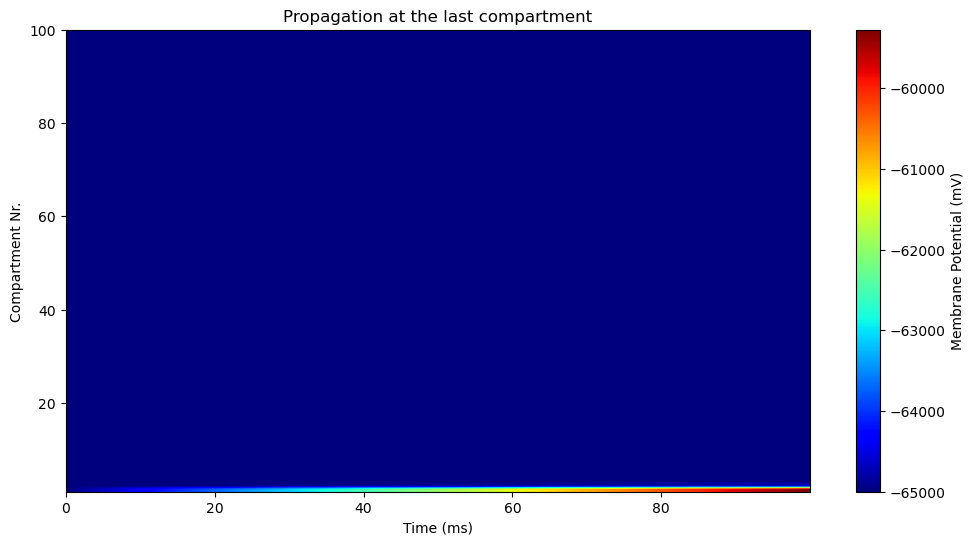

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants from the appendix
g_Na = 120.0  # mS/cm^2
g_K = 36.0    # mS/cm^2
g_L = 0.3     # mS/cm^2
V_Na = 50.0   # mV (注意：通常相对于静息电位的值)
V_K = -77.0   # mV (注意：通常相对于静息电位的值)
V_L = -54.4   # mV (注意：通常相对于静息电位的值)
V_rest = -65.0  # mV (注意：通常神经元的静息电位约为-65 mV)
C_m = 1.0     # μF/cm^2
p_axon = 1.0  # Ohm*m
r_axon = 2e-6 # m
l_comp = 0.1e-6 # m
T = 6.3       # Temperature in °C

# Derived constants
Ra = p_axon * l_comp / (np.pi * r_axon**2)  # Axial resistance

# Simulation parameters
n_compartments = 100
duration = 100e-3 
dt = 25e-6  
time = np.arange(0, duration, dt)
n_timesteps = len(time)

# Stimulus for the first experiment: Stimulate at the last compartment
I_stim_1 = np.zeros((n_compartments, n_timesteps))
I_stim_1[-1, int(5e-3/dt):int(10e-3/dt)] = 5.0  # μA/cm^2

# Stimulus for the second experiment: Stimulate compartments 20 and 80
I_stim_2 = np.zeros((n_compartments, n_timesteps))
I_stim_2[19, 0:int(5e-3/dt)] = 5.0  # μA/cm^2
I_stim_2[79, int(15e-3/dt):int(20e-3/dt)] = 5.0  # μA/cm^2

# Hodgkin-Huxley rate functions (adjusted with V_rest)
def alpha_m(V): return 0.1 * (V_rest + 25 - V) / (np.exp((V_rest + 25 - V) / 10) - 1)
def beta_m(V): return 4.0 * np.exp(-(V - V_rest) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V - V_rest) / 20)
def beta_h(V): return 1 / (np.exp((V_rest + 30 - V) / 10) + 1)
def alpha_n(V): return 0.01 * (V_rest + 10 - V) / (np.exp((V_rest + 10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-(V - V_rest) / 80)

# Temperature correction
phi = 3.0**((T - 6.3) / 10)

# Define the C matrix according to the provided structure
C = np.diag([-2] * (n_compartments - 1) + [-1]) + np.diag([1] * (n_compartments - 1), k=1) + np.diag([1] * (n_compartments - 1), k=-1)
A = np.eye(n_compartments) - dt / (C_m * Ra) * C

# Hodgkin-Huxley equations
def hodgkin_huxley(t, y):
    V = y[:n_compartments]
    m = y[n_compartments:2*n_compartments]
    h = y[2*n_compartments:3*n_compartments]
    n = y[3*n_compartments:]
    
    dVdt = np.zeros(n_compartments)
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    
    I_Na = g_Na * m**3 * h * (V_Na - V)
    I_K = g_K * n**4 * (V_K - V)
    I_L = g_L * (V_L - V)
    I_ion = I_Na + I_K + I_L
    
    # Apply stimulus for the first compartment at specific times
    if int(5e-3/dt) <= t/dt < int(10e-3/dt):
        I_ion[-1] += 5.0  # μA/cm^2
    
    dVdt = (I_ion + np.dot(C, V)) / C_m
    
    return np.concatenate((dVdt, dmdt, dhdt, dndt))

# Initial conditions
V0 = V_rest * np.ones(n_compartments)
m0 = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest)) * np.ones(n_compartments)
h0 = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest)) * np.ones(n_compartments)
n0 = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest)) * np.ones(n_compartments)
y0 = np.concatenate((V0, m0, h0, n0))

# Solve ODE
sol = solve_ivp(hodgkin_huxley, [time[0], time[-1]], y0, method='RK45', t_eval=time)

# Extract voltage data
Vm_matrix_1 = sol.y[:n_compartments].T * 1e3  # Scale to mV

# Visualization
plt.figure(figsize=(12, 6))

plt.imshow(Vm_matrix_1.T, aspect='auto', cmap='jet', origin='lower', 
           extent=(time[0]*1e3, time[-1]*1e3, 1, n_compartments))
plt.colorbar(label='Membrane Potential (mV)')
plt.title('Propagation at the last compartment')
plt.ylabel('Compartment Nr.')
plt.xlabel('Time (ms)')
plt.show()


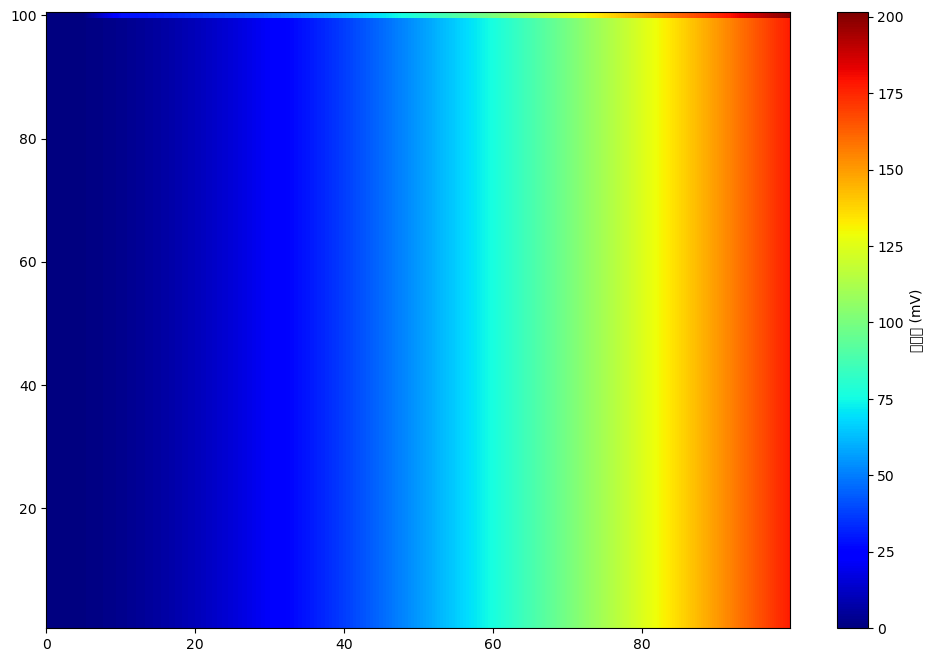

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# 参数设置
g_Na = 120.0  # mS/cm^2
g_K = 36.0    # mS/cm^2
g_L = 0.3     # mS/cm^2
V_Na = 115.0  # mV
V_K = -12.0   # mV
V_L = 10.6    # mV
V_rest = 0.0  # mV
C_m = 1.0     # μF/cm^2
p_axon = 1.0  # Ohm·m
r_axon = 2e-6 # m
l_comp = 0.1e-6 # m
T = 6.3       # °C

# 计算轴突内阻
Ra = p_axon * l_comp / (np.pi * r_axon**2)

# 模拟参数
n_compartments = 100
duration = 100e-3
dt = 25e-6
n_timesteps = int(duration / dt)

# 初始化状态变量
time = np.arange(0, duration, dt)

# 刺激设置：最后一个室进行刺激
I_stim = np.zeros((n_compartments, n_timesteps))
I_stim[-1, int(5e-3/dt):int(10e-3/dt)] = 5.0  # μA/cm^2

# Hodgkin-Huxley率函数和温度修正因子（这里需要您自行定义）
def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
def beta_m(V): return 4.0 * np.exp(-V / 18)
def alpha_h(V): return 0.07 * np.exp(-V / 20)
def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)
def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-V / 80)
k = 3.0**((T - 6.3) / 10)

# C矩阵的定义
C = np.diag([-2] * (n_compartments - 1) + [-1]) + np.diag([1] * (n_compartments - 1), k=1) + np.diag([1] * (n_compartments - 1), k=-1)
A = np.eye(n_compartments) - dt / (C_m * Ra) * C

# # 运行模拟的函数
# def run_simulation(I_stim):
#     # 这里需要添加您自己的模拟代码，确保使用solve函数解决系统
#     Vm_matrix = np.zeros((n_compartments, n_timesteps)) # 100*4000
#     # Initialize gating variables
#     V = V_rest * np.ones((n_compartments, 1))
#     m = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest)) * np.ones((n_compartments, 1)) #m_0
#     h = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest)) * np.ones((n_compartments, 1))
#     n = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest)) * np.ones((n_compartments, 1))

#     for t_idx in range(1, n_timesteps):
#     # Update gating variables
#         m = m + dt * k * (alpha_m(V) * (1 - m) - beta_m(V) * m)
#         h = h + dt * k * (alpha_h(V) * (1 - h) - beta_h(V) * h)
#         n = n + dt * k * (alpha_n(V) * (1 - n) - beta_n(V) * n)

#     # Calculate ionic currents
#         I_Na = g_Na * m**3 * h * (V - V_Na)
#         I_K = g_K * n**4 * (V - V_K)
#         I_L = g_L * (V - V_L)
#         I_ion = I_Na + I_K + I_L

#     # Update the membrane potential
#         A = np.eye(n_compartments) - dt / (C_m * Ra) * C
#         b = V + dt / C_m * (I_stim[:, t_idx].reshape(-1, 1) - I_ion)
#         V = solve(A, b)

#     # Store the computed potentials in the matrix
#         Vm_matrix[:, t_idx] = V.flatten()

#     return Vm_matrix
def run_simulation(I_stim):    
    Vm_matrix = np.zeros((n_compartments, n_timesteps)) # 100*4000

    V = V_rest * np.ones((n_compartments, 1)) 
    m = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest)) * np.ones((n_compartments, 1))
    h = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest)) * np.ones((n_compartments, 1))
    n = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest)) * np.ones((n_compartments, 1))
    
    # Set the initial condition for Vm_matrix
    Vm_matrix[:, 0] = V[:, 0].flatten()
    
    for t_index in range(1, n_timesteps):
        # Predict the gating variables at t + dt using the values at t
        m = (m + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)  #还是用i-1s
        h = (h + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)
        n = (n + alpha_m(V) * dt) / (1 + (alpha_m(V)+beta_m(V)) * dt)
        
#         m_next = m + dt * k * (alpha_m(V) * (1 - m) - beta_m(V) * m)
#         h_next = h + dt * k * (alpha_h(V) * (1 - h) - beta_h(V) * h)
#         n_next = n + dt * k * (alpha_n(V) * (1 - n) - beta_n(V) * n)

        # Calculate the ionic currents at t + dt using predicted gating variables
        I_Na = g_Na * m**3 * h * (V - V_Na)
        I_K = g_K * n**4 * (V - V_K)
        I_L = g_L * (V - V_L)
        I_ion = I_Na + I_K + I_L
        
        # Construct the b vector for the implicit Euler method
        b = V + dt / C_m * (I_stim[:, t_index].reshape(-1, 1) - I_ion) # 将一维数组转换成二维列向量

        # Solve the system of equations for V at t + dt
        V = solve(A, b)

        # Store the computed potentials in the matrix
        Vm_matrix[:, t_index] = V.flatten()

#        # Update variables for the next iteration
#         V, m, h, n = V_next, m_next, h_next, n_next

    return Vm_matrix
# 运行模拟
Vm_matrix = run_simulation(I_stim) * 1e3  # 将结果缩放

# 可视化
plt.figure(figsize=(12, 8))
plt.pcolormesh(time * 1e3, np.arange(1, n_compartments + 1), Vm_matrix, cmap='jet', shading='auto')
plt.colorbar(label='膜电位 (mV)')
plt.show()
